In [1]:
!pip install fasttext
!pip install pandas
!pip install matplotlib
!pip install tqdm

In [3]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz

--2022-11-15 16:21:25--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938013 (916K) [binary/octet-stream]
Saving to: ‘lid.176.ftz’

lid.176.ftz         100%[===================>] 916.03K  1.03MB/s    in 0.9s    

2022-11-15 16:21:27 (1.03 MB/s) - ‘lid.176.ftz’ saved [938013/938013]



In [3]:
from pathlib import Path
from preprocess_utils import articles_num, filter_by_cz_lang, save_jsonb, create_handlers, load_jsonb, num_of_lines
from tqdm import tqdm
import logging

ModuleNotFoundError: No module named 'preprocess_utils'

In [ ]:
article_folder = Path("articles_json")

In [2]:
handlers = create_handlers("cz_filter", "%(content_ratio)s\n\nContent: %(msg)s\n\n")


NameError: name 'create_handlers' is not defined

In [7]:
handlers["ihned"].error("lul", extra={"content_ratio": 0.5})

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
folder = Path("articles_json")

In [10]:
stats = {}
total = {}
for file in folder.iterdir():
    stats[file.name] = {}

    stats[file.name]["c_r"] = []
    total[file.name] = 0
    for article, c_r, result  in filter_by_cz_lang(file, ratio=1.0, yield_false=True):
        stats[file.name]["c_r"].append(c_r)
        if not result:
            handlers[file.stem].error(article["content"], extra={"content_ratio": c_r})
        else:
            total[file.name] += 1



        



FileNotFoundError: [Errno 2] No such file or directory: 'articles_json'

In [ ]:
df = pd.DataFrame(stats["ihned.json"])

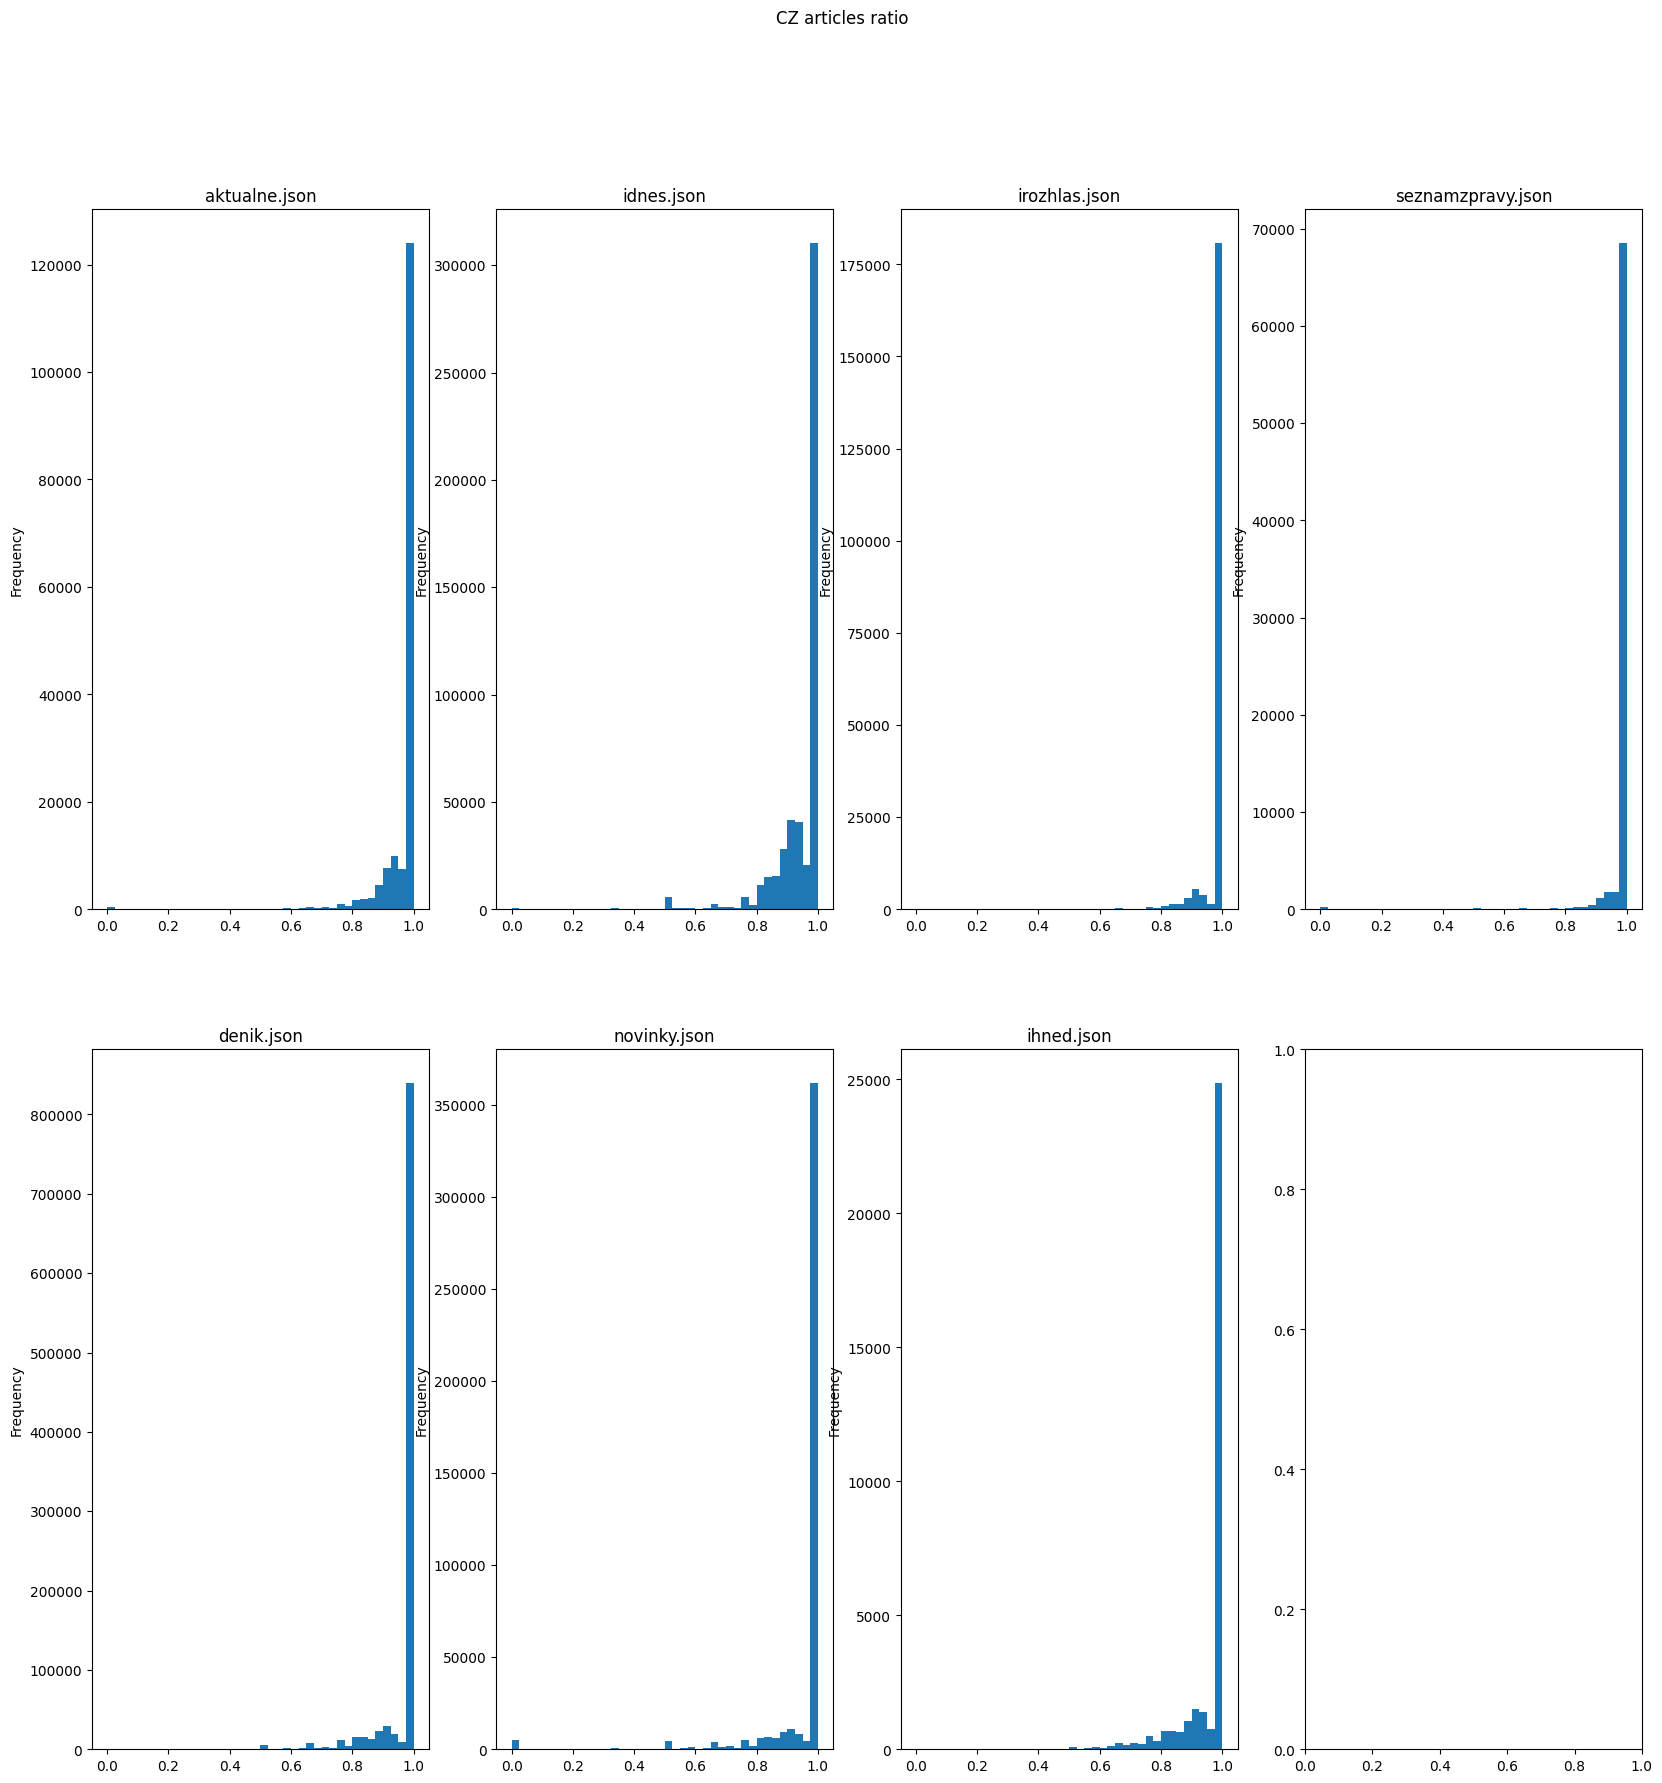

In [ ]:

i= 0
fig, axes = plt.subplots(2,4, figsize=(20, 20))
fig.suptitle("CZ articles ratio")
for k, v in stats.items():
    df = pd.DataFrame(v)
    df['c_r'].plot.hist(bins=40, ax=axes[i//4][i%4], title=k)
    i += 1

In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
from preprocess_utils import show_outlier_by_percentiles, show_outliers, show_df_lines, is_cz, pick_indexes

In [ ]:
dfs = {}
for k, v in stats.items():
    dfs[k] = pd.DataFrame(v)

,c_r
13323,0.496970
32940,0.493976
11642,0.487179
30020,0.483146
20574,0.477612
15937,0.473684
25277,0.468750
26562,0.466667
33037,0.454545
13628,0.450980


In [ ]:
for f, df in dfs.items():
    print("\n=======================================\n")
    print("File: ", f)
    df_o = show_outliers(df, "c_r", 0.75, "lower", limit=40, random=False)
    gen = pick_indexes(folder / f, df_o.index)
    for i in gen:
        print(i["content"])
        print("---------------------------------------")
        print("ratio: ", is_cz(i["content"]))
        print("-----------------------------------")



File:  aktualne.json
Londýn - V Londýně začalo ve čtvrtek natáčení 23. filmu o agentu 007 a studio Sony Pictures při té příležitosti uspořádalo oficiální tiskovou konferenci. Představilo protagonisty snímku nabitého hvězdami a oznámilo, že film ponese název Skyfall.
Kompletní obsazení a rozdělení rolí slavným hercům však stále zůstává neznámé, stejně jako děj snímku provázeného odklady kvůli finančním problémům. Jak velí tradice, studio dávkuje podrobnosti i "řízené úniky informací" velmi pomalu, aby napínalo publikum až k premiéře. Kupříkladu spekulace, že snímek ponese jméno Skyfall, se objevují už několik týdnů a producenti nyní v této souvislosti poznamenali, že to bylo "jedno z nejhůř střežených tajemství".
Foto: Reuters
Jisté zatím je, že Daniel Craig se potřetí objeví jako James Bond, režisérem bude Sam Mendes (Americká krása, Road to Perdition, Mariňák) a Judi Dench se vrátí jako šéfka M. Roli Moneypenny - která by se ve filmech s Craigem objevila poprvé - měla ztvárnit jako 

In [ ]:
dfs